### import bilbiotek

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [111]:
pd.set_option('display.max_columns', None)


### wczytanie danych

In [112]:
player_df = pd.read_csv('data_sec.csv', na_values='-')
player_df.head(10)

,Unnamed: 0,NAME,TEAM,POS,NAT,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,SAVES,GOALS CON,PEN CON,PEN SAVE,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,MATCH_ID
0,NaN,B. Leno,Fulham,GK,NaN,Germany,90,NaN,NaN,NaN,NaN,NaN,NaN,0/0,1/1,0/1,1.0,1.0,NaN,12.0,NaN,48.0,NaN,9.0,NaN,39.0,69%,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.8,3356597
1,NaN,K. Tete,Fulham,DR,NaN,Netherlands,90,NaN,NaN,NaN,NaN,NaN,1.0,1/0,2/0,7/2,1.0,NaN,NaN,9.0,NaN,47.0,3.0,6.0,NaN,24.0,75%,4.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,3356597
2,NaN,I. Diop,Fulham,DCR,NaN,France,90,NaN,NaN,NaN,NaN,NaN,NaN,4/3,0/0,0/4,5.0,NaN,NaN,7.0,NaN,45.0,NaN,NaN,NaN,35.0,80%,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,3356597
3,NaN,C. Bassey,Fulham,DCL,NaN,Nigeria,90,NaN,NaN,1.0,NaN,2.0,NaN,1/1,2/1,6/2,3.0,1.0,NaN,7.0,NaN,73.0,NaN,4.0,NaN,62.0,92%,7.0,6.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,3356597
4,NaN,A. Robinson,Fulham,DL,NaN,United States,90,NaN,NaN,NaN,NaN,NaN,NaN,8/6,3/2,14/10,6.0,NaN,NaN,14.0,1.0,64.0,2.0,7.0,NaN,33.0,76%,7.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,3356597
5,NaN,A. Pereira,Fulham,DMCR,NaN,Brazil,90,NaN,NaN,1.0,NaN,2.0,3.0,0/0,4/2,12/5,NaN,NaN,NaN,20.0,NaN,62.0,NaN,9.0,NaN,42.0,74%,16.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3356597
6,NaN,S. Lukić,Fulham,DMCL,NaN,Serbia,90,NaN,NaN,NaN,NaN,NaN,1.0,3/2,0/0,6/4,1.0,NaN,NaN,5.0,NaN,55.0,1.0,8.0,NaN,45.0,89%,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,3356597
7,NaN,Adama Traoré,Fulham,AMR,NaN,Spain,78,NaN,NaN,NaN,NaN,3.0,2.0,1/0,4/3,20/10,NaN,NaN,NaN,15.0,NaN,41.0,NaN,6.0,NaN,20.0,70%,11.0,1.0,NaN,3.0,NaN,2.0,4.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,3356597
8,NaN,E. Smith Rowe,Fulham,AMC,NaN,England,64,NaN,NaN,NaN,NaN,NaN,1.0,1/1,1/1,0/3,NaN,NaN,NaN,9.0,NaN,36.0,2.0,3.0,NaN,26.0,77%,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3356597
9,NaN,A. Iwobi,Fulham,AML,NaN,Nigeria,90,NaN,NaN,NaN,NaN,1.0,NaN,4/3,3/0,15/5,1.0,NaN,NaN,18.0,NaN,48.0,NaN,5.0,NaN,25.0,72%,10.0,NaN,NaN,1.0,NaN,NaN,1.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,3356597


In [113]:
match_df = pd.read_csv('matches_data.csv')
match_df.head()

,Date,Home,Away,match_id
0,2024-08-16,Man Utd,Fulham,3356597
1,2024-08-17,Ipswich,Liverpool,3356598
2,2024-08-17,Newcastle,Southampton,3356601
3,2024-08-17,Everton,Brighton,3356600
4,2024-08-17,Notts Forest,Bournemouth,3356602


In [114]:
df = pd.merge(left=player_df, right=match_df, left_on='MATCH_ID', right_on='match_id', how='inner')
df

,Unnamed: 0,NAME,TEAM,POS,NAT,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,SAVES,GOALS CON,PEN CON,PEN SAVE,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,MATCH_ID,Date,Home,Away,match_id
0,NaN,B. Leno,Fulham,GK,NaN,Germany,90,NaN,NaN,NaN,NaN,NaN,NaN,0/0,1/1,0/1,1.0,1.0,NaN,12.0,NaN,48.0,NaN,9.0,NaN,39.0,69%,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.8,3356597,2024-08-16,Man Utd,Fulham,3356597
1,NaN,K. Tete,Fulham,DR,NaN,Netherlands,90,NaN,NaN,NaN,NaN,NaN,1.0,1/0,2/0,7/2,1.0,NaN,NaN,9.0,NaN,47.0,3.0,6.0,NaN,24.0,75%,4.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,3356597,2024-08-16,Man Utd,Fulham,3356597
2,NaN,I. Diop,Fulham,DCR,NaN,France,90,NaN,NaN,NaN,NaN,NaN,NaN,4/3,0/0,0/4,5.0,NaN,NaN,7.0,NaN,45.0,NaN,NaN,NaN,35.0,80%,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,3356597,2024-08-16,Man Utd,Fulham,3356597
3,NaN,C. Bassey,Fulham,DCL,NaN,Nigeria,90,NaN,NaN,1.0,NaN,2.0,NaN,1/1,2/1,6/2,3.0,1.0,NaN,7.0,NaN,73.0,NaN,4.0,NaN,62.0,92%,7.0,6.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,3356597,2024-08-16,Man Utd,Fulham,3356597
4,NaN,A. Robinson,Fulham,DL,NaN,United States,90,NaN,NaN,NaN,NaN,NaN,NaN,8/6,3/2,14/10,6.0,NaN,NaN,14.0,1.0,64.0,2.0,7.0,NaN,33.0,76%,7.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,3356597,2024-08-16,Man Utd,Fulham,3356597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,NaN,J. Kluivert,Bournemouth,AMC,NaN,Netherlands,90,NaN,NaN,NaN,NaN,3.0,2.0,2/2,4/1,13/5,1.0,NaN,NaN,16.0,NaN,52.0,1.0,4.0,NaN,30.0,77%,22.0,1.0,NaN,1.0,NaN,NaN,NaN,11.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,3356967,2025-05-25,Bournemouth,Leicester,3356967
11314,NaN,A. Semenyo,Bournemouth,AML,NaN,Ghana,90,2.0,NaN,NaN,NaN,3.0,NaN,1/1,3/0,12/2,NaN,NaN,NaN,9.0,1.0,51.0,NaN,1.0,NaN,29.0,90%,15.0,3.0,NaN,4.0,2.0,1.0,1.0,9.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,8.8,3356967,2025-05-25,Bournemouth,Leicester,3356967
11315,NaN,Evanilson,Bournemouth,S,NaN,Brazil,90,NaN,NaN,NaN,NaN,2.0,1.0,0/0,3/1,8/3,NaN,NaN,NaN,4.0,NaN,18.0,NaN,3.0,NaN,12.0,83%,9.0,NaN,NaN,2.0,NaN,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,3356967,2025-05-25,Bournemouth,Leicester,3356967
11316,NaN,D. Jebbison,Bournemouth,F,NaN,Canada,27,NaN,NaN,NaN,NaN,NaN,2.0,2/1,1/1,7/4,NaN,NaN,NaN,8.0,NaN,17.0,NaN,1.0,NaN,3.0,100%,2.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,3356967,2025-05-25,Bournemouth,Leicester,3356967


### zmiana nazw kolumn

In [115]:
df_renamed = df.rename(columns={'Unnamed: 5': 'COUNTRY',
                                'Unnamed: 6': 'MINUTES_PLAYED',
                                'Unnamed: 7': 'GOALS',
                                'Unnamed: 8': 'ASSISTS',
                                'Unnamed: 9': 'YELLOW_CARDS',
                                'Unnamed: 10': 'RED_CARDS',}).drop(['Unnamed: 0', 'NAT', 'MATCH_ID', 'match_id', 'SAVES',
                                                                    'GOALS CON', 'PEN CON', 'PEN SAVE'], axis=1)
df_renamed.head()

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,Home,Away
0,B. Leno,Fulham,GK,Germany,90,NaN,NaN,NaN,NaN,NaN,NaN,0/0,1/1,0/1,1.0,1.0,NaN,12.0,NaN,48.0,NaN,9.0,NaN,39.0,69%,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,2024-08-16,Man Utd,Fulham
1,K. Tete,Fulham,DR,Netherlands,90,NaN,NaN,NaN,NaN,NaN,1.0,1/0,2/0,7/2,1.0,NaN,NaN,9.0,NaN,47.0,3.0,6.0,NaN,24.0,75%,4.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,6.3,2024-08-16,Man Utd,Fulham
2,I. Diop,Fulham,DCR,France,90,NaN,NaN,NaN,NaN,NaN,NaN,4/3,0/0,0/4,5.0,NaN,NaN,7.0,NaN,45.0,NaN,NaN,NaN,35.0,80%,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,2024-08-16,Man Utd,Fulham
3,C. Bassey,Fulham,DCL,Nigeria,90,NaN,NaN,1.0,NaN,2.0,NaN,1/1,2/1,6/2,3.0,1.0,NaN,7.0,NaN,73.0,NaN,4.0,NaN,62.0,92%,7.0,6.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.9,2024-08-16,Man Utd,Fulham
4,A. Robinson,Fulham,DL,United States,90,NaN,NaN,NaN,NaN,NaN,NaN,8/6,3/2,14/10,6.0,NaN,NaN,14.0,1.0,64.0,2.0,7.0,NaN,33.0,76%,7.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,7.5,2024-08-16,Man Utd,Fulham


### obsługa wartości brakujących

In [116]:
df_renamed.isna().sum()

NAME                   0
TEAM                   0
POS                    1
COUNTRY                0
MINUTES_PLAYED         0
GOALS              10332
ASSISTS            10564
YELLOW_CARDS        9756
RED_CARDS          11266
FOULS               6192
FOULED              6357
TACKLES ATT/WON        0
AERIALS ATT/WON        0
DUELS ATT/WON          0
CLEAR               5061
ERR CHANCE         10896
ERR GOAL           11140
POSS LOST            886
OFFSIDE            10284
TOUCHES              610
INTERCEP            7419
RECOV               2042
LAST MAN TACKLE    11186
PASSES               677
PASS COMP %          740
FINAL THIRD         1076
LONG BALL           3645
PEN                11255
SHOTS               6206
ON TARGET           8784
BLOCKED             9138
DRIBBLES            7754
TOUCHES IN BOX      4743
BIG CHANCE         10083
CROSSES             6588
DECISIVE           10959
FIRST              10962
EQUALISER          11111
PEN WON            11249
RATING              1685


In [117]:
df_non_na = df_renamed.fillna(0)
df_non_na

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,TACKLES ATT/WON,AERIALS ATT/WON,DUELS ATT/WON,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,PASS COMP %,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,Home,Away
0,B. Leno,Fulham,GK,Germany,90,0.0,0.0,0.0,0.0,0.0,0.0,0/0,1/1,0/1,1.0,1.0,0.0,12.0,0.0,48.0,0.0,9.0,0.0,39.0,69%,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,2024-08-16,Man Utd,Fulham
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1/0,2/0,7/2,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,75%,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,Man Utd,Fulham
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,4/3,0/0,0/4,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,80%,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,Man Utd,Fulham
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,1/1,2/1,6/2,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,92%,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,Man Utd,Fulham
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,8/6,3/2,14/10,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,76%,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,Man Utd,Fulham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,J. Kluivert,Bournemouth,AMC,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,2/2,4/1,13/5,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,77%,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,Bournemouth,Leicester
11314,A. Semenyo,Bournemouth,AML,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,1/1,3/0,12/2,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,90%,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,Bournemouth,Leicester
11315,Evanilson,Bournemouth,S,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0/0,3/1,8/3,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,83%,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,Bournemouth,Leicester
11316,D. Jebbison,Bournemouth,F,Canada,27,0.0,0.0,0.0,0.0,0.0,2.0,2/1,1/1,7/4,0.0,0.0,0.0,8.0,0.0,17.0,0.0,1.0,0.0,3.0,100%,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,6.2,2025-05-25,Bournemouth,Leicester


### tu bedzie analiza zawodnikow bez ratingu

### Wyodrębnienie danych z kolumn

In [118]:
df_non_na['TACKLES_ATT'] = df_non_na['TACKLES ATT/WON'].str.split('/', expand=True)[0]
df_non_na['TACKLES_WON'] = df_non_na['TACKLES ATT/WON'].str.split('/', expand=True)[1]

df_non_na['AERIALS_ATT'] = df_non_na['AERIALS ATT/WON'].str.split('/', expand=True)[0]
df_non_na['AERIALS_WON'] = df_non_na['AERIALS ATT/WON'].str.split('/', expand=True)[1]

df_non_na['DUELS_ATT'] = df_non_na['DUELS ATT/WON'].str.split('/', expand=True)[0]
df_non_na['DUELS_WON'] = df_non_na['DUELS ATT/WON'].str.split('/', expand=True)[1]

df_non_na['PASS_COMP_RATIO'] = df_non_na['PASS COMP %'].str.split('%', expand=True)[0]

df_non_na['PLAYED_HOME'] = (df_non_na['Home'] == df_non_na['TEAM']).astype(int)

df_clean = df_non_na.drop(['TACKLES ATT/WON', 'AERIALS ATT/WON', 'DUELS ATT/WON', 'PASS COMP %', 'Home', 'Away'], axis=1)
df_clean

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
0,B. Leno,Fulham,GK,Germany,90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,0.0,48.0,0.0,9.0,0.0,39.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,2024-08-16,0,0,1,1,0,1,69,0
1,K. Tete,Fulham,DR,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75,0
2,I. Diop,Fulham,DCR,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80,0
3,C. Bassey,Fulham,DCL,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92,0
4,A. Robinson,Fulham,DL,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,J. Kluivert,Bournemouth,AMC,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77,1
11314,A. Semenyo,Bournemouth,AML,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90,1
11315,Evanilson,Bournemouth,S,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83,1
11316,D. Jebbison,Bournemouth,F,Canada,27,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,17.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,6.2,2025-05-25,2,1,1,1,7,4,100,1


In [119]:
df_clean.isnull().sum()

NAME                 0
TEAM                 0
POS                  0
COUNTRY              0
MINUTES_PLAYED       0
GOALS                0
ASSISTS              0
YELLOW_CARDS         0
RED_CARDS            0
FOULS                0
FOULED               0
CLEAR                0
ERR CHANCE           0
ERR GOAL             0
POSS LOST            0
OFFSIDE              0
TOUCHES              0
INTERCEP             0
RECOV                0
LAST MAN TACKLE      0
PASSES               0
FINAL THIRD          0
LONG BALL            0
PEN                  0
SHOTS                0
ON TARGET            0
BLOCKED              0
DRIBBLES             0
TOUCHES IN BOX       0
BIG CHANCE           0
CROSSES              0
DECISIVE             0
FIRST                0
EQUALISER            0
PEN WON              0
RATING               0
Date                 0
TACKLES_ATT          0
TACKLES_WON          0
AERIALS_ATT          0
AERIALS_WON          0
DUELS_ATT            0
DUELS_WON            0
PASS_COMP_R

### tu bedzie analiza zawodnikow, ktorzy nie zaliczyli celnego podania XDD

In [120]:
no_passes_idx = df_clean[df_clean['PASS_COMP_RATIO'].isna()].index
df_non_na['PASS COMP %'].iloc[no_passes_idx].value_counts()

PASS COMP %
0    740
Name: count, dtype: int64

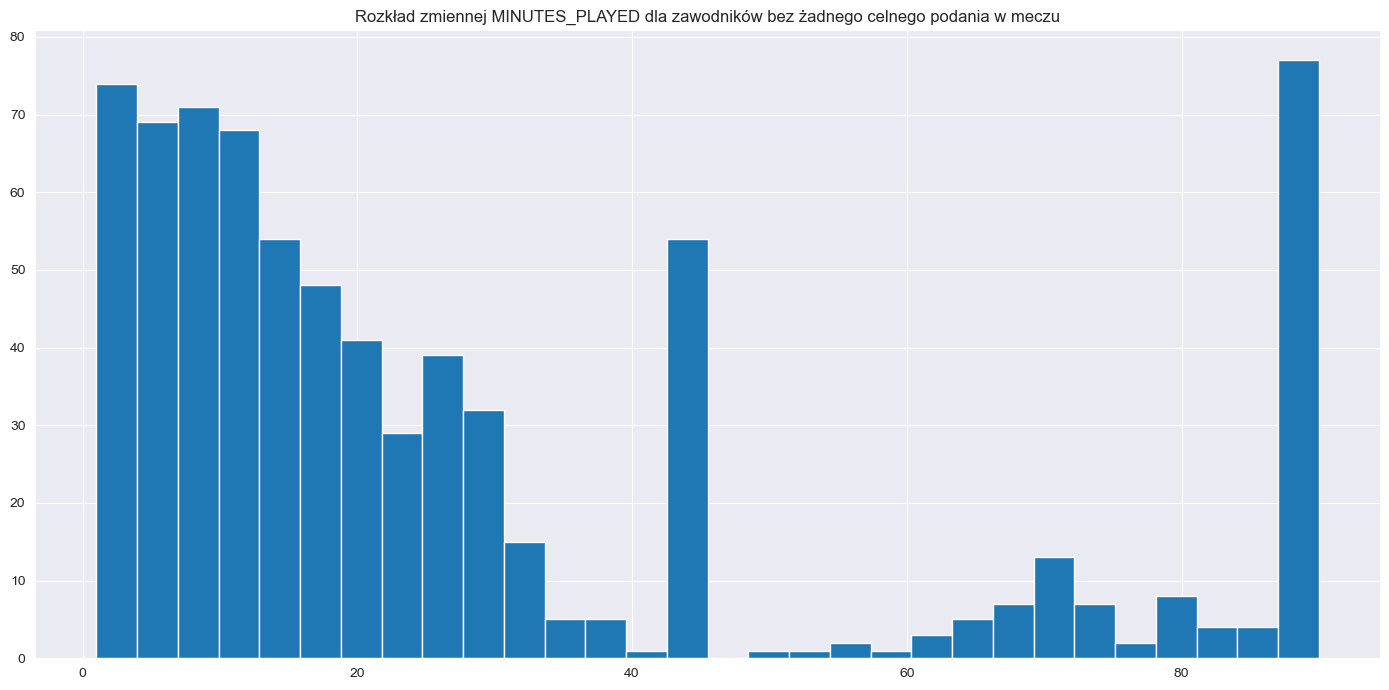

In [121]:
no_passes_minutes_played = df_non_na['MINUTES_PLAYED'].iloc[no_passes_idx]

plt.figure(figsize=(14,7))
plt.hist(no_passes_minutes_played, bins=30)
plt.title('Rozkład zmiennej MINUTES_PLAYED dla zawodników bez żadnego celnego podania w meczu')
plt.tight_layout()
plt.show()

In [122]:
df_clean['PASSES'][df_clean['PASS_COMP_RATIO'].isna()].value_counts()

PASSES
0.0    677
1.0     30
2.0     23
3.0      7
4.0      2
6.0      1
Name: count, dtype: int64

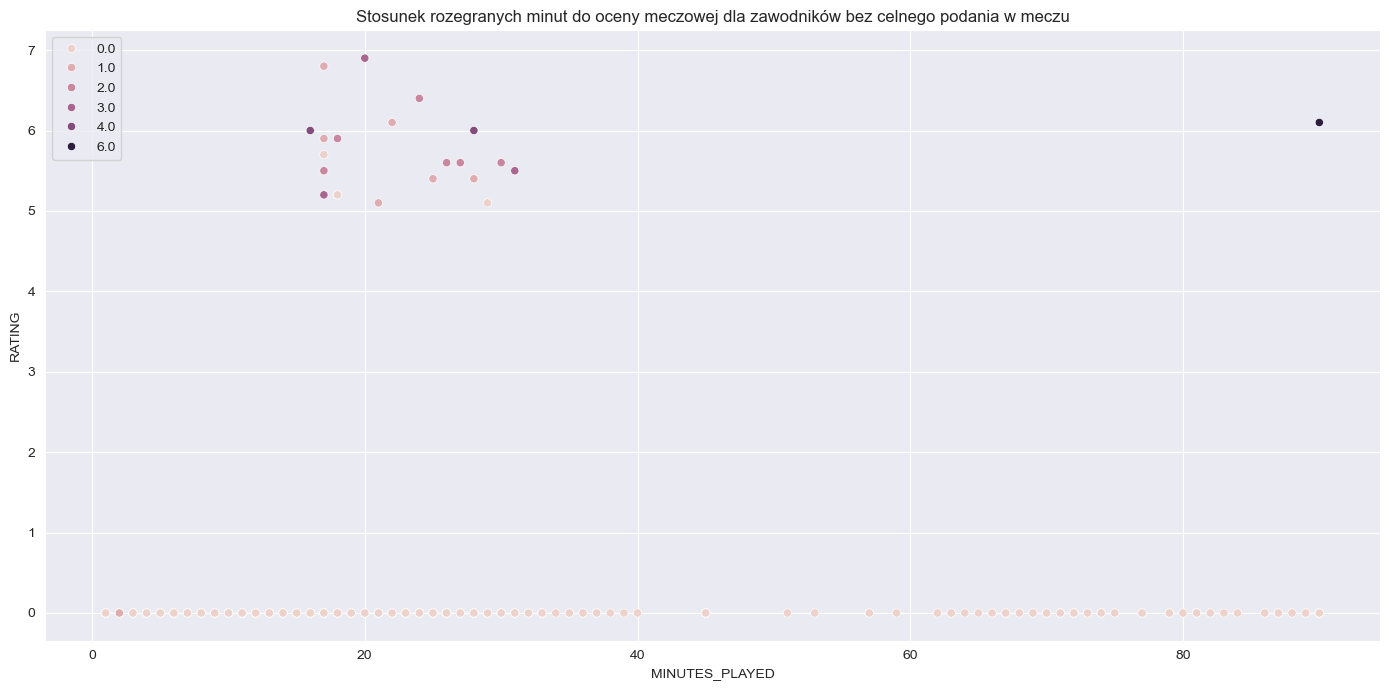

In [123]:
no_passes = df_non_na.iloc[no_passes_idx]

plt.figure(figsize=(14,7))
sns.scatterplot(data=no_passes, x='MINUTES_PLAYED', y='RATING', hue='PASSES')
plt.xlabel('MINUTES_PLAYED')
plt.ylabel('RATING')
plt.title('Stosunek rozegranych minut do oceny meczowej dla zawodników bez celnego podania w meczu')
plt.legend()
plt.tight_layout()
plt.show()

In [124]:
df_clean[['TACKLES_ATT', 'TACKLES_WON', 'AERIALS_ATT', 'AERIALS_WON', 'DUELS_ATT', 'DUELS_WON', 'PASS_COMP_RATIO']] = (
    df_clean[['TACKLES_ATT', 'TACKLES_WON', 'AERIALS_ATT', 'AERIALS_WON', 'DUELS_ATT', 'DUELS_WON', 'PASS_COMP_RATIO']].apply(pd.to_numeric, errors='coerce')
)
df_clean['Date'] = pd.to_datetime((df_clean['Date']))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11318 entries, 0 to 11317
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             11318 non-null  object        
 1   TEAM             11318 non-null  object        
 2   POS              11318 non-null  object        
 3   COUNTRY          11318 non-null  object        
 4   MINUTES_PLAYED   11318 non-null  int64         
 5   GOALS            11318 non-null  float64       
 6   ASSISTS          11318 non-null  float64       
 7   YELLOW_CARDS     11318 non-null  float64       
 8   RED_CARDS        11318 non-null  float64       
 9   FOULS            11318 non-null  float64       
 10  FOULED           11318 non-null  float64       
 11  CLEAR            11318 non-null  float64       
 12  ERR CHANCE       11318 non-null  float64       
 13  ERR GOAL         11318 non-null  float64       
 14  POSS LOST        11318 non-null  float

### Zmniejszenie kardynalności zmiennej POS

- M: midfielder -> M
- F: forward -> F
- GK: goalkeeper -> drop
- DL: left defender -> D
- DR: right defender -> D
- S: striker -> F
- D: defender -> D
- DCR: defender central right -> D
- DCL: defender central left -> D
- DMCR: defensive midfielder central right -> M
- DMCL: defensive midfielder central left -> M
- AMR: attacking midfielder right -> M
- AML: attacking midfielder left -> M
- AMC: attacking midfielder central -> M
- MCR: midfielder central right -> M
- MCL: midfielder central left -> M
- DC: defender central -> D
- AMCR: attacking midfielder central right -> M
- AMCL: attacking midfielder central left -> M
- DML: defender mid left -> D 
- DMR: defender mid right??? -> D
- MC: midfielder central -> M
- WL: winger left -> F
- WR: winger right -> F
- ML: midfielder left -> M
- MR: midfielder right -> M
- FCR: forward central right -> F
- FCL: forward central left -> F
- DMC: defensive midfielder central -> M

In [125]:
df_clean['POS'].value_counts()

POS
M       1328
F       1013
GK       769
DL       760
DR       758
S        707
D        618
DCR      602
DCL      601
DMCL     541
DMCR     539
AMR      449
AML      449
AMC      423
MCR      185
MCL      185
DC       178
AMCR     152
AMCL     152
DML      139
DMR      139
MC       136
WL       116
WR       116
ML        61
MR        61
FCR       53
FCL       53
DMC       34
0          1
Name: count, dtype: int64

In [126]:
pos_map = {
    "M": "M",
    "F": "F",
    "GK": "GK",  # drop
    "DL": "D",
    "DR": "D",
    "S": "F",
    "D": "D",
    "DCR": "D",
    "DCL": "D",
    "DMCR": "M",
    "DMCL": "M",
    "AMR": "M",
    "AML": "M",
    "AMC": "M",
    "MCR": "M",
    "MCL": "M",
    "DC": "D",
    "AMCR": "M",
    "AMCL": "M",
    "DML": "D",
    "DMR": "D",
    "MC": "M",
    "WL": "F",
    "WR": "F",
    "ML": "M",
    "MR": "M",
    "FCR": "F",
    "FCL": "F",
    "DMC": "M"
}


In [127]:
df_clean['POS'] = df_clean['POS'].map(pos_map)
df_clean.head(10)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
0,B. Leno,Fulham,GK,Germany,90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,0.0,48.0,0.0,9.0,0.0,39.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,2024-08-16,0,0,1,1,0,1,69.0,0
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0
6,S. Lukić,Fulham,M,Serbia,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,55.0,1.0,8.0,0.0,45.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,2024-08-16,3,2,0,0,6,4,89.0,0
7,Adama Traoré,Fulham,M,Spain,78,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,15.0,0.0,41.0,0.0,6.0,0.0,20.0,11.0,1.0,0.0,3.0,0.0,2.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,4,3,20,10,70.0,0
8,E. Smith Rowe,Fulham,M,England,64,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,36.0,2.0,3.0,0.0,26.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,1,1,1,1,0,3,77.0,0
9,A. Iwobi,Fulham,M,Nigeria,90,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,0.0,48.0,0.0,5.0,0.0,25.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,6.1,2024-08-16,4,3,3,0,15,5,72.0,0


### Wykluczenie bramkarzy z analizy

In [128]:
df_drop_gk = df_clean[df_clean['POS'] != "GK"]
df_drop_gk.head()

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0


In [129]:
df_drop_gk.shape

(10549, 45)

### Ile trzeba rozegrać minut, żeby dostać rating za mecz?

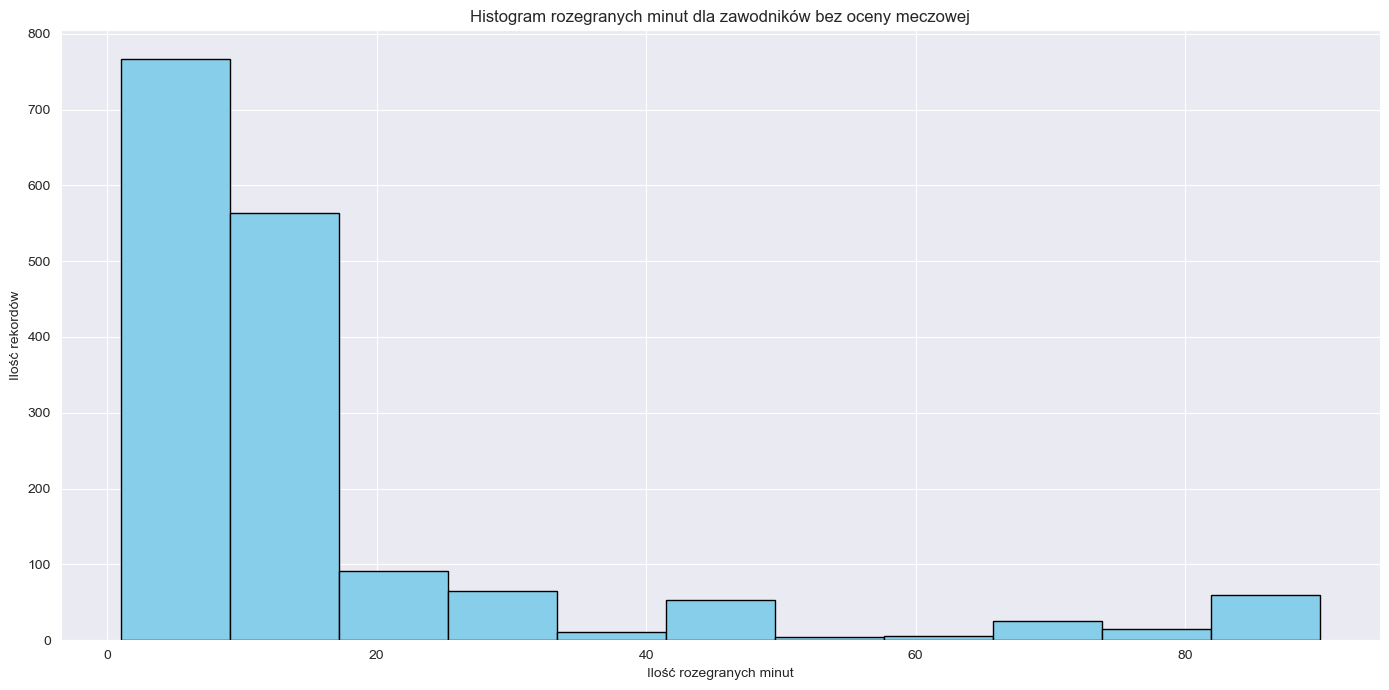

Liczba zawodników bez oceny meczowej: 1659


In [130]:
no_rating = df_drop_gk[df_drop_gk['RATING'] == 0]

no_of_bins = int(1+np.log2(len(no_rating)))

plt.figure(figsize=(14,7))
plt.hist(no_rating['MINUTES_PLAYED'], color='skyblue', edgecolor='black', bins=no_of_bins)
plt.xlabel('Ilość rozegranych minut')
plt.ylabel('Ilość rekordów')
plt.title('Histogram rozegranych minut dla zawodników bez oceny meczowej')
plt.tight_layout()
plt.show()

print(f'Liczba zawodników bez oceny meczowej: {len(no_rating)}')

In [131]:
df_drop_gk['MINUTES_PLAYED'][df_drop_gk['RATING'] > 0].sort_values()

6949    11
157     15
4525    15
4738    15
4401    15
        ..
4995    90
4986    90
4980    90
5012    90
5583    90
Name: MINUTES_PLAYED, Length: 8890, dtype: int64

In [132]:
min_arg = df_drop_gk['MINUTES_PLAYED'][df_drop_gk['RATING'] > 0].idxmin()
df_drop_gk.loc[min_arg]

NAME                       J. Stephens
TEAM                       Southampton
POS                                  D
COUNTRY                        England
MINUTES_PLAYED                      11
GOALS                              0.0
ASSISTS                            0.0
YELLOW_CARDS                       0.0
RED_CARDS                          0.0
FOULS                              0.0
FOULED                             0.0
CLEAR                              1.0
ERR CHANCE                         0.0
ERR GOAL                           0.0
POSS LOST                          1.0
OFFSIDE                            0.0
TOUCHES                            5.0
INTERCEP                           0.0
RECOV                              0.0
LAST MAN TACKLE                    0.0
PASSES                             4.0
FINAL THIRD                        0.0
LONG BALL                          1.0
PEN                                0.0
SHOTS                              0.0
ON TARGET                

### Wykluczenie zawodników bez oceny z dalszej analizy

In [133]:
df_non_na_ratings = df_drop_gk[df_drop_gk['RATING'] != 0]
print(df_non_na_ratings.shape)
df_non_na_ratings.head(10)

(8890, 45)


,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0
6,S. Lukić,Fulham,M,Serbia,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,55.0,1.0,8.0,0.0,45.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,2024-08-16,3,2,0,0,6,4,89.0,0
7,Adama Traoré,Fulham,M,Spain,78,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,15.0,0.0,41.0,0.0,6.0,0.0,20.0,11.0,1.0,0.0,3.0,0.0,2.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,4,3,20,10,70.0,0
8,E. Smith Rowe,Fulham,M,England,64,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,36.0,2.0,3.0,0.0,26.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,1,1,1,1,0,3,77.0,0
9,A. Iwobi,Fulham,M,Nigeria,90,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,0.0,48.0,0.0,5.0,0.0,25.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,6.1,2024-08-16,4,3,3,0,15,5,72.0,0
10,Rodrigo Muniz,Fulham,F,Brazil,78,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0,22.0,1.0,2.0,0.0,6.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,10,4,15,6,83.0,0


In [134]:
df_drop_gk[(df_drop_gk['RATING'] == 0) & (df_drop_gk['MINUTES_PLAYED'] >= 15)]

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
105,Daniel Podence,Wolves,M,Portugal,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-08-17,0,0,0,0,0,0,NaN,0
213,J. Ward-Prowse,West Ham,M,England,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-08-17,0,0,0,0,0,0,NaN,1
243,O. Edouard,Crystal Palace,F,France,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-08-18,0,0,0,0,0,0,NaN,0
374,H. Wilson,Fulham,M,Wales,21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-08-24,0,0,0,0,0,0,NaN,1
435,Richarlison,Tottenham,F,Brazil,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-08-24,0,0,0,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11257,J. Clarke,Ipswich,M,England,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-05-25,0,0,0,0,0,0,NaN,1
11273,M. Odegaard,Arsenal,M,Norway,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2025-05-25,0,0,0,0,0,0,NaN,0
11279,Welington,Southampton,D,Brazil,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-05-25,0,0,0,0,0,0,NaN,1
11281,Mateus Fernandes,Southampton,M,Portugal,90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-05-25,0,0,0,0,0,0,NaN,1


no ogolnie to chyba jakis blad w danych, bo zawodnicy co rozegrali nawet pelny mecz (90 minut) maja prawie wszsystkie kolumny na 0, co jest niemożliwe do uzyskania grając całe spotkanie LOL

### Rozkład zmiennej objaśnianej

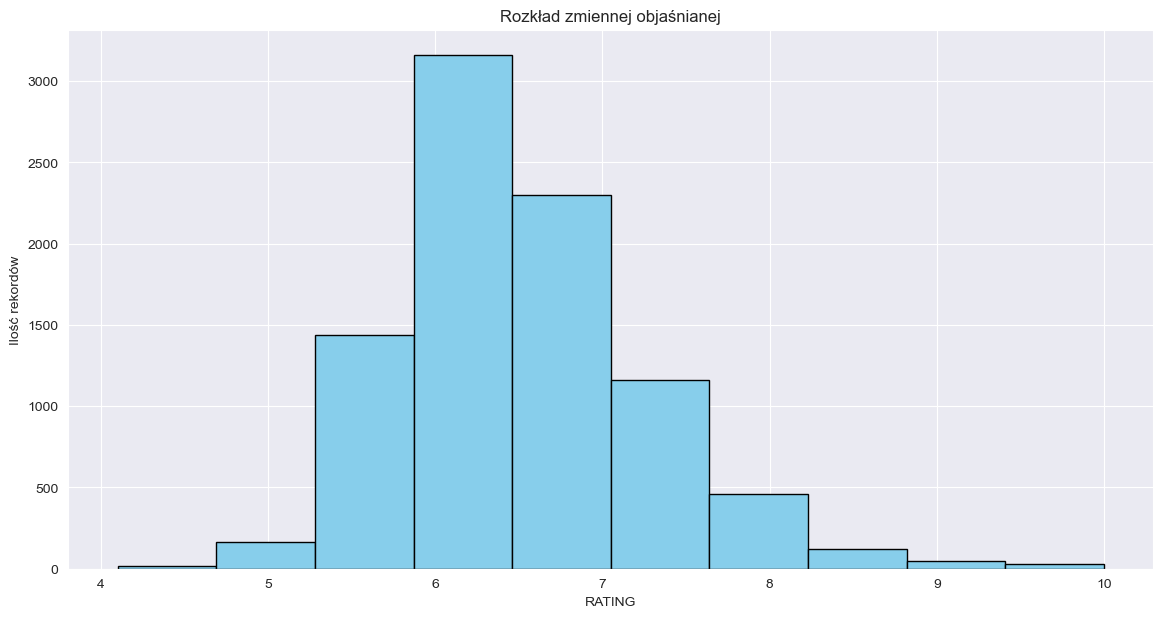

In [135]:
no_of_bins = int(1+np.log2(len(df_non_na_ratings)))

plt.figure(figsize=(14,7))
plt.hist(df_non_na_ratings['RATING'], color='skyblue', edgecolor='black')
plt.xlabel('RATING')
plt.ylabel('Ilość rekordów')
plt.title('Rozkład zmiennej objaśnianej')
plt.show()

In [136]:
test, p_value = sp.stats.normaltest(df_non_na_ratings['RATING'])
if p_value <= 0.05:
    print(f'Na 95% rozkład zmiennej objaśnianej nie pochodzi z rozkładu normalnego\np_value = {p_value}')
else:
    print(f'Na 95% nie ma podstaw do odrzucenia hipotezy o rozkładzie normalnym zmiennej objaśnianej\np_value = {p_value}')

Na 95% rozkład zmiennej objaśnianej nie pochodzi z rozkładu normalnego
p_value = 1.4718625327315442e-233


In [137]:
df_non_na_ratings.groupby('NAME')['TEAM'].nunique().sort_values(ascending=False).head(5).reset_index()

,NAME,TEAM
0,J. Philogene,2
1,B. Johnson,2
2,T. Chalobah,2
3,A. Disasi,2
4,J. Enciso,2


philogene przeszedl z aston villi do ipswich
b johnson to 2 innych pilkarzy xdxd
chalobach z chelsea do cp i odwrotnie
disasi z chelsea do aston villa
enciso ipswich brighton i wgl
sprawdzmy johsnona

In [138]:
df_non_na_ratings[['TEAM', 'COUNTRY']][df_non_na_ratings['NAME'] == 'B. Johnson']

,TEAM,COUNTRY
57,Ipswich,England
281,Tottenham,Wales
405,Ipswich,England
429,Tottenham,Wales
839,Tottenham,Wales
1171,Tottenham,Wales
1341,Tottenham,Wales
1747,Tottenham,Wales
1881,Ipswich,England
2078,Tottenham,Wales


In [139]:
def fix_name(row: pd.Series) -> pd.Series:
    if row['NAME'] == 'B. Johnson':
        if row['COUNTRY'] == 'England':
            row['NAME'] = 'Ben Johnson'
        elif row['COUNTRY'] == 'Wales':
            row['NAME'] = 'Brennan Johnson'
    return row

In [140]:
df_non_na_ratings = df_non_na_ratings.apply(fix_name, axis=1)
df_non_na_ratings[(df_non_na_ratings['NAME'] == 'Ben Johnson') | (df_non_na_ratings['NAME'] == 'Brennan Johnson')]

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
57,Ben Johnson,Ipswich,M,England,33,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,21.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-17,4,2,2,1,8,5,78.0,1
281,Brennan Johnson,Tottenham,F,Wales,78,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,44.0,0.0,3.0,0.0,26.0,17.0,0.0,0.0,2.0,1.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,6.5,2024-08-19,6,3,2,1,12,8,77.0,0
405,Ben Johnson,Ipswich,D,England,90,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,16.0,0.0,39.0,2.0,2.0,0.0,15.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,6.2,2024-08-24,3,2,0,0,13,4,67.0,0
429,Brennan Johnson,Tottenham,F,Wales,90,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,0.0,29.0,0.0,0.0,0.0,19.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,5.8,2024-08-24,2,2,2,1,7,3,79.0,1
839,Brennan Johnson,Tottenham,M,Wales,45,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,32.0,0.0,5.0,0.0,20.0,14.0,0.0,0.0,2.0,1.0,0.0,2.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,2024-09-01,2,2,2,2,7,6,75.0,0
1171,Brennan Johnson,Tottenham,F,Wales,68,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,26.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,4.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,5.9,2024-09-15,0,0,0,0,6,2,93.0,1
1341,Brennan Johnson,Tottenham,F,Wales,70,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,11.0,1.0,34.0,0.0,2.0,0.0,20.0,14.0,1.0,0.0,6.0,2.0,2.0,0.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,2024-09-21,0,0,1,1,5,1,70.0,1
1747,Brennan Johnson,Tottenham,F,Wales,76,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,9.0,0.0,42.0,1.0,3.0,0.0,28.0,17.0,0.0,0.0,3.0,1.0,1.0,0.0,9.0,0.0,1.0,1.0,1.0,0.0,0.0,7.3,2024-09-29,1,1,0,0,3,1,82.0,0
1881,Ben Johnson,Ipswich,D,England,90,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,14.0,0.0,70.0,0.0,5.0,0.0,40.0,13.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.1,2024-10-05,4,4,1,1,0,7,83.0,0
2078,Brennan Johnson,Tottenham,F,Wales,90,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,1.0,34.0,0.0,3.0,0.0,20.0,6.0,1.0,0.0,3.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6.9,2024-10-06,3,1,1,0,6,4,80.0,0


jak rozni sie wplyw poszczegolnych statystyk w zaleznosci od pozycji

In [141]:
defenders = df_non_na_ratings[df_non_na_ratings['POS'] == 'D']
midfielders = df_non_na_ratings[df_non_na_ratings['POS'] == 'M']
forwards = df_non_na_ratings[df_non_na_ratings['POS'] == 'F']

defenders_corr = defenders.corr(numeric_only=True)['RATING'].sort_values(key=abs, ascending=False)
midfielders_corr = midfielders.corr(numeric_only=True)['RATING'].sort_values(key=abs, ascending=False)
forwards_corr = forwards.corr(numeric_only=True)['RATING'].sort_values(key=abs, ascending=False)
print(f'Defenders: \n{defenders_corr.head(10)}\n Midfielders: \n{midfielders_corr.head(10)}\n Forwards: \n{forwards_corr.head(10)}')

Defenders: 
RATING         1.000000
TOUCHES        0.438717
DUELS_WON      0.365116
PASSES         0.359177
TACKLES_WON    0.328952
FINAL THIRD    0.324991
GOALS          0.315786
BIG CHANCE     0.291849
RECOV          0.274988
ASSISTS        0.262597
Name: RATING, dtype: float64
 Midfielders: 
RATING            1.000000
GOALS             0.581984
TOUCHES           0.516995
ON TARGET         0.481623
BIG CHANCE        0.465957
FINAL THIRD       0.458710
PASSES            0.444847
ASSISTS           0.426473
SHOTS             0.408671
MINUTES_PLAYED    0.364456
Name: RATING, dtype: float64
 Forwards: 
RATING            1.000000
GOALS             0.750171
ON TARGET         0.648295
TOUCHES IN BOX    0.557586
SHOTS             0.538404
TOUCHES           0.531569
PASSES            0.477881
DECISIVE          0.447506
BIG CHANCE        0.446395
FINAL THIRD       0.441597
Name: RATING, dtype: float64


czy srednia ocena zawodnika z klubu ma zwiazek z miejscem w tabeli

In [142]:
t = df_non_na_ratings.groupby('TEAM')['RATING'].agg(['mean', 'median', 'std']).sort_values(ascending=False, by='mean')
t['RATING_POS'] = np.arange(1,21,1)
t

,mean,median,std,RATING_POS
TEAM,,,,
Man City,6.870670,6.7,0.813824,1
Liverpool,6.772473,6.6,0.823664,2
Arsenal,6.764465,6.7,0.779658,3
Chelsea,6.682217,6.6,0.760380,4
Newcastle,6.584116,6.4,0.781222,5
Brighton,6.531136,6.4,0.712791,6
Man Utd,6.530568,6.4,0.763603,7
Bournemouth,6.514159,6.4,0.734710,8
Fulham,6.507143,6.4,0.643044,9


In [143]:
df_table = pd.read_csv('premier_league_2024_25_table.csv')
df_table

,Club,Position
0,Liverpool,1
1,Arsenal,2
2,Man City,3
3,Chelsea,4
4,Newcastle,5
5,Aston Villa,6
6,Notts Forest,7
7,Brighton,8
8,Bournemouth,9
9,Brentford,10


In [144]:
df_pos_rating = pd.merge(left=t, right=df_table, left_on='TEAM', right_on='Club', how='inner')
df_pos_rating

,mean,median,std,RATING_POS,Club,Position
0,6.870670,6.7,0.813824,1,Man City,3
1,6.772473,6.6,0.823664,2,Liverpool,1
2,6.764465,6.7,0.779658,3,Arsenal,2
3,6.682217,6.6,0.760380,4,Chelsea,4
4,6.584116,6.4,0.781222,5,Newcastle,5
5,6.531136,6.4,0.712791,6,Brighton,8
6,6.530568,6.4,0.763603,7,Man Utd,15
7,6.514159,6.4,0.734710,8,Bournemouth,9
8,6.507143,6.4,0.643044,9,Fulham,11
9,6.482944,6.4,0.764716,10,Brentford,10


In [145]:
df_pos_rating['RATING_POS'].corr(df_pos_rating['Position'])

0.8466165413533834

In [146]:
df_pos_rating['ABS_RATING_POS_DIFFERENCE'] = abs(df_pos_rating['RATING_POS'] - df_pos_rating['Position'])
df_pos_rating.sort_values(by='ABS_RATING_POS_DIFFERENCE', ascending=False)

,mean,median,std,RATING_POS,Club,Position,ABS_RATING_POS_DIFFERENCE
6,6.530568,6.4,0.763603,7,Man Utd,15,8
12,6.465795,6.4,0.726890,13,Aston Villa,6,7
10,6.479913,6.4,0.781984,11,Tottenham,17,6
11,6.466813,6.4,0.698565,12,Notts Forest,7,5
8,6.507143,6.4,0.643044,9,Fulham,11,2
15,6.422296,6.4,0.660860,16,West Ham,14,2
14,6.434339,6.3,0.708703,15,Everton,13,2
13,6.444270,6.4,0.719919,14,Crystal Palace,12,2
0,6.870670,6.7,0.813824,1,Man City,3,2
5,6.531136,6.4,0.712791,6,Brighton,8,2


najlepsze wystepy

In [147]:
df_non_na_ratings.sort_values(by='RATING', ascending=False)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
564,N. Madueke,Chelsea,M,England,90,3.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,11.0,0.0,38.0,0.0,4.0,0.0,18.0,6.0,0.0,0.0,6.0,5.0,0.0,0.0,6.0,1.0,2.0,1.0,0.0,0.0,0.0,10.0,2024-08-25,1,1,0,0,8,3,83.0,0
878,M. Salah,Liverpool,M,Egypt,90,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,13.0,2.0,53.0,1.0,5.0,0.0,34.0,21.0,2.0,0.0,3.0,1.0,1.0,2.0,11.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,2024-09-01,1,1,0,0,9,5,76.0,0
1542,B. Saka,Arsenal,M,England,90,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,20.0,0.0,102.0,1.0,4.0,0.0,54.0,39.0,0.0,0.0,7.0,2.0,4.0,8.0,14.0,4.0,11.0,0.0,0.0,0.0,0.0,10.0,2024-09-28,2,1,1,0,24,12,93.0,1
1570,C. Palmer,Chelsea,M,England,90,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,2.0,46.0,0.0,4.0,0.0,25.0,14.0,7.0,1.0,7.0,5.0,0.0,1.0,6.0,3.0,4.0,1.0,0.0,1.0,0.0,10.0,2024-09-28,1,1,0,0,5,3,68.0,1
6269,J. Kluivert,Bournemouth,M,Netherlands,90,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,15.0,0.0,51.0,0.0,7.0,0.0,29.0,20.0,2.0,0.0,3.0,3.0,0.0,1.0,4.0,0.0,5.0,1.0,1.0,0.0,0.0,10.0,2025-01-18,0,0,0,0,6,2,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,14.0,0.0,68.0,2.0,4.0,0.0,55.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,2024-12-29,4,0,3,2,8,7,80.0,1
891,Casemiro,Man Utd,M,Brazil,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,14.0,0.0,45.0,0.0,3.0,0.0,37.0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2024-09-01,1,1,1,1,6,3,70.0,1
9472,N. Mazraoui,Man Utd,D,Morocco,78,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,38.0,0.0,1.0,0.0,31.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2025-04-13,3,0,5,1,9,4,87.0,0
5748,Y. Sugawara,Southampton,D,Japan,45,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,0.0,19.0,0.0,1.0,0.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.1,2025-01-04,0,0,1,0,0,0,86.0,1


In [148]:
df_non_na_ratings.sort_values(by='RATING', ascending=True)

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
5748,Y. Sugawara,Southampton,D,Japan,45,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,0.0,19.0,0.0,1.0,0.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.1,2025-01-04,0,0,1,0,0,0,86.0,1
4555,C. Coady,Leicester,D,England,90,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,9.0,0.0,58.0,0.0,2.0,0.0,50.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,2024-12-14,1,0,1,1,3,2,84.0,0
891,Casemiro,Man Utd,M,Brazil,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,14.0,0.0,45.0,0.0,3.0,0.0,37.0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2024-09-01,1,1,1,1,6,3,70.0,1
9472,N. Mazraoui,Man Utd,D,Morocco,78,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,38.0,0.0,1.0,0.0,31.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,2025-04-13,3,0,5,1,9,4,87.0,0
5392,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,14.0,0.0,68.0,2.0,4.0,0.0,55.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,2024-12-29,4,0,3,2,8,7,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,E. Haaland,Man City,M,Norway,90,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,21.0,0.0,1.0,0.0,12.0,7.0,0.0,0.0,5.0,4.0,0.0,0.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,10.0,2024-08-31,2,2,0,0,4,3,67.0,0
6623,D. Ouattara,Bournemouth,F,Burkina Faso,90,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,15.0,2.0,37.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,4.0,4.0,0.0,1.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,2025-01-25,1,1,6,2,14,5,81.0,1
878,M. Salah,Liverpool,M,Egypt,90,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,13.0,2.0,53.0,1.0,5.0,0.0,34.0,21.0,2.0,0.0,3.0,1.0,1.0,2.0,11.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,2024-09-01,1,1,0,0,9,5,76.0,0
7142,Y. Minteh,Brighton,D,Gambia,89,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,9.0,1.0,35.0,1.0,5.0,0.0,12.0,5.0,0.0,0.0,2.0,2.0,0.0,3.0,7.0,1.0,2.0,0.0,0.0,0.0,0.0,10.0,2025-02-14,5,4,5,2,22,12,67.0,1


In [149]:
df_non_na_ratings.groupby('NAME')['GOALS'].sum().sort_values(ascending=False)

NAME
M. Salah            29.0
A. Isak             23.0
E. Haaland          22.0
B. Mbeumo           20.0
C. Wood             20.0
                    ... 
D. Jebbison          0.0
D. Ings              0.0
D. Dalot             0.0
M. Gusto             0.0
Youssef Chermiti     0.0
Name: GOALS, Length: 460, dtype: float64

In [150]:
df_non_na_ratings.groupby('NAME')['RATING'].mean().sort_values(ascending=False)

NAME
M. Salah            7.497368
M. Kovačić          7.221429
B. Saka             7.212000
B. Fernandes        7.211111
J. Doku             7.180952
                      ...   
D. Mubama           5.400000
Youssef Chermiti    5.400000
A. Grønbaek         5.350000
H. Armstrong        5.300000
B. Godfrey          5.166667
Name: RATING, Length: 460, dtype: float64

In [151]:
df_non_na_ratings

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,M,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1
11313,J. Kluivert,Bournemouth,M,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1
11314,A. Semenyo,Bournemouth,M,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1
11315,Evanilson,Bournemouth,F,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1


# MACHINE LEARNING

In [152]:
df_non_na_ratings

,NAME,TEAM,POS,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME
1,K. Tete,Fulham,D,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0
2,I. Diop,Fulham,D,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0
3,C. Bassey,Fulham,D,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0
4,A. Robinson,Fulham,D,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0
5,A. Pereira,Fulham,M,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,M,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1
11313,J. Kluivert,Bournemouth,M,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1
11314,A. Semenyo,Bournemouth,M,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1
11315,Evanilson,Bournemouth,F,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1


In [154]:
df_non_na_ratings = pd.get_dummies(df_non_na_ratings, columns=['POS'])
df_non_na_ratings

,NAME,TEAM,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME,POS_D,POS_F,POS_M
1,K. Tete,Fulham,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0,True,False,False
2,I. Diop,Fulham,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0,True,False,False
3,C. Bassey,Fulham,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0,True,False,False
4,A. Robinson,Fulham,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0,True,False,False
5,A. Pereira,Fulham,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1,False,False,True
11313,J. Kluivert,Bournemouth,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1,False,False,True
11314,A. Semenyo,Bournemouth,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1,False,False,True
11315,Evanilson,Bournemouth,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1,False,True,False


In [155]:
df_non_na_ratings[['POS_D', 'POS_M', 'POS_F']] = df_non_na_ratings[['POS_D', 'POS_M', 'POS_F']].astype(int)
df_non_na_ratings

,NAME,TEAM,COUNTRY,MINUTES_PLAYED,GOALS,ASSISTS,YELLOW_CARDS,RED_CARDS,FOULS,FOULED,CLEAR,ERR CHANCE,ERR GOAL,POSS LOST,OFFSIDE,TOUCHES,INTERCEP,RECOV,LAST MAN TACKLE,PASSES,FINAL THIRD,LONG BALL,PEN,SHOTS,ON TARGET,BLOCKED,DRIBBLES,TOUCHES IN BOX,BIG CHANCE,CROSSES,DECISIVE,FIRST,EQUALISER,PEN WON,RATING,Date,TACKLES_ATT,TACKLES_WON,AERIALS_ATT,AERIALS_WON,DUELS_ATT,DUELS_WON,PASS_COMP_RATIO,PLAYED_HOME,POS_D,POS_F,POS_M
1,K. Tete,Fulham,Netherlands,90,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,47.0,3.0,6.0,0.0,24.0,4.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.3,2024-08-16,1,0,2,0,7,2,75.0,0,1,0,0
2,I. Diop,Fulham,France,90,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,0.0,35.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4,2024-08-16,4,3,0,0,0,4,80.0,0,1,0,0
3,C. Bassey,Fulham,Nigeria,90,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,0.0,73.0,0.0,4.0,0.0,62.0,7.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,2024-08-16,1,1,2,1,6,2,92.0,0,1,0,0
4,A. Robinson,Fulham,United States,90,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,14.0,1.0,64.0,2.0,7.0,0.0,33.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2024-08-16,8,6,3,2,14,10,76.0,0,1,0,0
5,A. Pereira,Fulham,Brazil,90,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,20.0,0.0,62.0,0.0,9.0,0.0,42.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,2024-08-16,0,0,4,2,12,5,74.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,D. Brooks,Bournemouth,Wales,63,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,14.0,0.0,44.0,0.0,3.0,0.0,25.0,16.0,0.0,0.0,3.0,2.0,0.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,6.5,2025-05-25,2,1,0,0,12,6,76.0,1,0,0,1
11313,J. Kluivert,Bournemouth,Netherlands,90,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,16.0,0.0,52.0,1.0,4.0,0.0,30.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,6.6,2025-05-25,2,2,4,1,13,5,77.0,1,0,0,1
11314,A. Semenyo,Bournemouth,Ghana,90,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,51.0,0.0,1.0,0.0,29.0,15.0,3.0,0.0,4.0,2.0,1.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.0,8.8,2025-05-25,1,1,3,0,12,2,90.0,1,0,0,1
11315,Evanilson,Bournemouth,Brazil,90,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,0.0,3.0,0.0,12.0,9.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,2025-05-25,0,0,3,1,8,3,83.0,1,0,1,0


In [156]:
from sklearn.model_selection import train_test_split

X = df_non_na_ratings.drop(['NAME', 'TEAM', 'COUNTRY', 'RATING', 'Date'], axis=1)
y = df_non_na_ratings['RATING']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


DT = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, max_features=None, random_state=101)
DT.fit(X_train, y_train)
pred = DT.predict(X_test)
print(f'Mean squared error: {mean_squared_error(y_test, pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test, pred)}')
print(f'R2 score: {r2_score(y_test, pred)}')

Mean squared error: 0.2521766029246344
Mean absolute error: 0.37137232845894275
R2 score: 0.5544461534090963


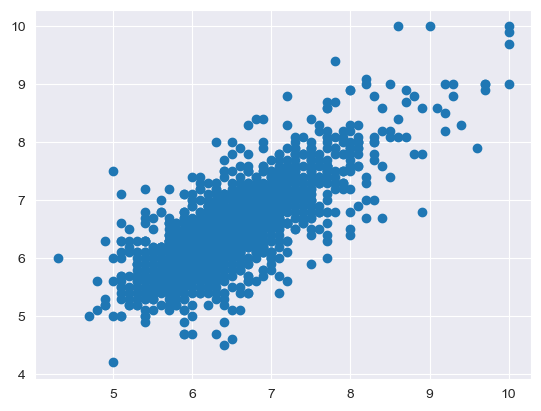

In [159]:
plt.scatter(y_test, pred)

In [160]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

print(f'Mean squared error: {mean_squared_error(y_test, RF_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test, RF_pred)}')
print(f'R2 score: {r2_score(y_test, RF_pred)}')

Mean squared error: 0.1166331619797525
Mean absolute error: 0.25027221597300336
R2 score: 0.7939287255143597


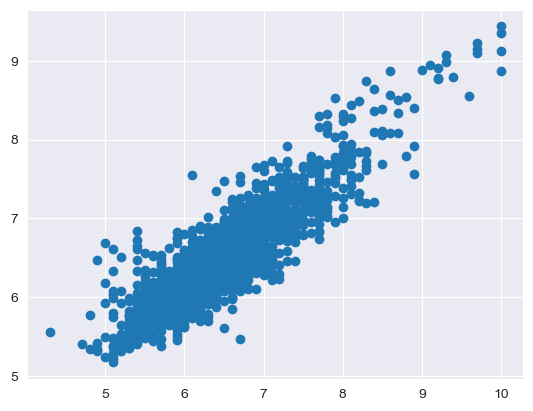

In [161]:
plt.scatter(y_test, RF_pred)

In [162]:
RF.feature_importances_

array([1.34250727e-02, 2.60103462e-01, 6.48445797e-02, 3.57829723e-03,
       2.12523762e-03, 5.39530285e-03, 4.14892234e-03, 1.94014671e-02,
       4.96173857e-03, 2.40003137e-02, 1.62309363e-02, 1.35455509e-03,
       2.38392925e-01, 1.72422042e-02, 1.56454756e-02, 1.29796678e-02,
       1.81735384e-02, 2.20160523e-02, 1.22418394e-02, 5.51265123e-04,
       5.62309218e-03, 8.60079996e-03, 1.94415729e-03, 5.91163587e-03,
       1.43665480e-02, 7.18940856e-02, 6.07189386e-03, 3.51450072e-04,
       2.45072733e-04, 1.26451714e-04, 8.86105920e-05, 7.46580100e-03,
       4.04878068e-02, 7.42427491e-03, 8.02386146e-03, 9.48230874e-03,
       1.64249596e-02, 3.04405875e-02, 2.59338382e-03, 2.50435535e-03,
       1.62485293e-03, 1.49115798e-03])